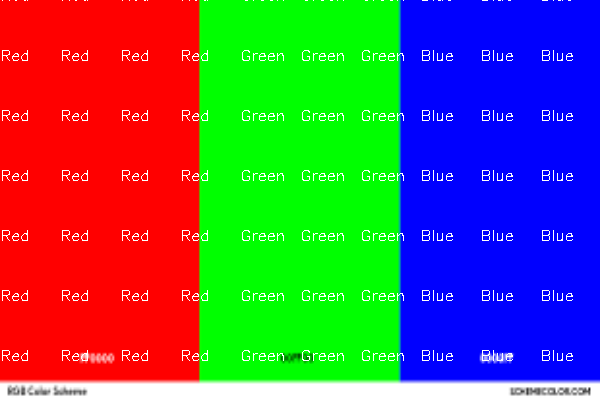

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # remove if using pure Jupyter


COLOR_RANGES = {
    "Red": [
        ((0, 120, 70), (10, 255, 255)),
        ((170, 120, 70), (180, 255, 255))
    ],
    "Orange": [((10, 100, 20), (20, 255, 255))],
    "Yellow": [((20, 100, 100), (30, 255, 255))],
    "Green": [((36, 100, 100), (86, 255, 255))],
    "Blue": [((94, 80, 2), (126, 255, 255))],
    "Purple": [((125, 50, 50), (145, 255, 255))],
    "Pink": [((145, 50, 50), (170, 255, 255))],
    "Brown": [((10, 100, 20), (20, 200, 150))],
    "White": [((0, 0, 200), (180, 30, 255))],
    "Black": [((0, 0, 0), (180, 255, 30))]
}


def detect_color_hsv(hsv_img, x, y, region=10):
    h, w, _ = hsv_img.shape

    x1 = max(0, x - region)
    y1 = max(0, y - region)
    x2 = min(w, x + region)
    y2 = min(h, y + region)

    roi = hsv_img[y1:y2, x1:x2]
    avg_hsv = np.mean(roi.reshape(-1, 3), axis=0)

    h_val, s_val, v_val = avg_hsv

    for color, ranges in COLOR_RANGES.items():
        for lower, upper in ranges:
            lower = np.array(lower)
            upper = np.array(upper)
            if lower[0] <= h_val <= upper[0] and \
               lower[1] <= s_val <= upper[1] and \
               lower[2] <= v_val <= upper[2]:
                return color

    return "Unknown"

image_path = "/content/download (2).png"  # change path if needed
image = cv2.imread(image_path)

if image is None:
    print("Image not found!")
else:
    image = cv2.resize(image, (600, 400))

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    step_size = 60
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            color_name = detect_color_hsv(hsv_image, x, y)

            cv2.putText(
                image,
                color_name,
                (x, y),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (255, 255, 255),
                1
            )

    cv2_imshow(image)
